<a href="https://colab.research.google.com/github/Stelaaa/POKnapsackProblem/blob/main/Problema_da_mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema da mochila

outras referencias:
https://vitorebatista.medium.com/algoritmo-gen%C3%A9tico-para-o-problema-da-mochila-5910f90f9488



### Método aleatório

In [1]:
import numpy as np

# Parâmetros do problema
pesos = np.array([2, 3, 5, 7, 1])  # Pesos dos itens
valores = np.array([10, 5, 15, 7, 6])  # Valores dos itens
capacidade = 10  # Capacidade da mochila
num_tentativas = 1000  # Número de soluções aleatórias a serem testadas

# Função para gerar uma solução aleatória
def gerar_solucao_aleatoria(n):
    return np.random.randint(2, size=n)  # Gera um vetor de 0s e 1s (1 = item selecionado)

# Função para avaliar uma solução
def avaliar_solucao(solucao, pesos, valores, capacidade):
    peso_total = np.dot(solucao, pesos)  # np.dot multiplica o array e calcula o peso total da solução
    if peso_total > capacidade:
        return -1  # Solução inválida (ultrapassa a capacidade)
    return np.dot(solucao, valores)  # Retorna o valor total da solução

# Método aleatório para resolver o problema da mochila
def resolver_mochila_aleatorio(pesos, valores, capacidade, num_tentativas):
    melhor_solucao = None
    melhor_valor = -1

    for _ in range(num_tentativas):
        solucao = gerar_solucao_aleatoria(len(pesos))  # Gera uma solução aleatória
        valor = avaliar_solucao(solucao, pesos, valores, capacidade)  # Avalia a solução

        if valor > melhor_valor:  # Atualiza a melhor solução encontrada
            melhor_solucao = solucao
            melhor_valor = valor

    return melhor_solucao, melhor_valor

# Resolve o problema
melhor_solucao, melhor_valor = resolver_mochila_aleatorio(pesos, valores, capacidade, num_tentativas)

# Exibe os resultados
print("Melhor solução encontrada:", melhor_solucao)
print("Valor total da solução:", melhor_valor)
print("Peso total da solução:", np.dot(melhor_solucao, pesos))

Melhor solução encontrada: [1 0 1 0 1]
Valor total da solução: 31
Peso total da solução: 8


## Metodo força bruta

In [8]:
def calcular_valor_mochila(combinacao, pesos, valores, capacidade):

    peso_total = 0  # Inicializa o peso total da combinação.
    valor_total = 0  # Inicializa o valor total da combinação.

    # Itera sobre cada item na combinação.
    for i in range(len(combinacao)):
        if combinacao[i] == 1:  # Se o item foi selecionado.
            peso_total += pesos[i]  # Adiciona o peso do item ao peso total.
            valor_total += valores[i]  # Adiciona o valor do item ao valor total.

    # Verifica se o peso total excede a capacidade da mochila.
    if peso_total > capacidade:
        return -1  # Retorna -1 para indicar que a combinação é inválida.
    else:
        return valor_total, peso_total  # Retorna o valor total e o peso total da combinação.

# Parâmetros do problema
pesos = [2, 3, 5, 7, 1]  # Pesos dos itens
valores = [10, 5, 15, 7, 6]  # Valores dos itens
capacidade = 10  # Capacidade da mochila
n = len(pesos)  # Número de itens

# Encontra a melhor combinação
melhor_combinacao = None
melhor_valor = -1
melhor_peso = 0

# Itera sobre todas as combinações possíveis (2^n)
for i in range(2**n):
    combinacao = []
    # Converte o número i para uma combinação de 0s e 1s
    for j in range(n):
        combinacao.append((i >> j) & 1)  # Verifica se o j-ésimo bit de i está ligado

    # Calcula o valor e o peso da combinação
    resultado = calcular_valor_mochila(combinacao, pesos, valores, capacidade)
    if resultado != -1:  # Se a combinação for válida
        valor, peso = resultado
        if valor > melhor_valor:  # Se o valor for maior que o melhor valor encontrado
            melhor_combinacao = combinacao
            melhor_valor = valor
            melhor_peso = peso

# Exibe a melhor combinação no formato solicitado
print("Melhor solução encontrada:", melhor_combinacao)
print("Valor total da solução:", melhor_valor)
print("Peso total da solução:", melhor_peso)

Melhor solução encontrada: [1, 0, 1, 0, 1]
Valor total da solução: 31
Peso total da solução: 8


## Algoritmo Genético

In [19]:
import random

# Parâmetros do problema
pesos = [2, 3, 5, 7, 1]  # Pesos dos itens
valores = [10, 5, 15, 7, 6]  # Valores dos itens
capacidade = 10  # Capacidade da mochila
n = len(pesos)  # Número de itens

# Parâmetros do algoritmo genético
tamanho_populacao = 10  # Número de indivíduos na população
num_geracoes = 20  # Número de gerações
taxa_mutacao = 0.1  # Chance de um gene (0 ou 1) sofrer mutação

# Função para criar um indivíduo aleatório
def criar_individuo():
    return [random.randint(0, 1) for _ in range(n)]  # Lista de 0s e 1s aleatórios

# Função para calcular a nota (fitness) de um indivíduo
def calcular_nota(individuo):
    peso_total = sum(pesos[i] for i in range(n) if individuo[i] == 1)
    valor_total = sum(valores[i] for i in range(n) if individuo[i] == 1)
    if peso_total > capacidade:
        return 0  # Nota zero se o peso exceder a capacidade
    else:
        return valor_total  # Nota é o valor total dos itens na mochila

# Função para selecionar os melhores indivíduos
def selecionar_pais(populacao):
    # Ordena a população pela nota (do maior para o menor)
    populacao_ordenada = sorted(populacao, key=calcular_nota, reverse=True)
    # Escolhe os 50% melhores para serem pais
    return populacao_ordenada[:tamanho_populacao // 2]

# Função para fazer crossover (reprodução)
def crossover(pai1, pai2):
    ponto_corte = random.randint(1, n - 1)  # Escolhe um ponto de corte aleatório
    filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]  # Mistura partes dos pais
    filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
    return filho1, filho2

# Função para aplicar mutação
def mutar(individuo):
    for i in range(n):
        if random.random() < taxa_mutacao:  # Chance de mutação
            individuo[i] = 1 - individuo[i]  # Troca 0 por 1 ou 1 por 0
    return individuo

# Cria a população inicial
populacao = [criar_individuo() for _ in range(tamanho_populacao)]

# Executa o algoritmo genético
for geracao in range(num_geracoes):
    # Seleciona os pais
    pais = selecionar_pais(populacao)

    # Cria a próxima geração
    nova_geracao = []
    while len(nova_geracao) < tamanho_populacao:
        pai1, pai2 = random.sample(pais, 2)  # Escolhe dois pais aleatórios
        filho1, filho2 = crossover(pai1, pai2)  # Faz crossover
        nova_geracao.append(mutar(filho1))  # Aplica mutação e adiciona à nova geração
        nova_geracao.append(mutar(filho2))

    # Substitui a população antiga pela nova
    populacao = nova_geracao

# Encontra o melhor indivíduo da última geração
melhor_individuo = max(populacao, key=calcular_nota)
melhor_nota = calcular_nota(melhor_individuo)
melhor_peso = sum(pesos[i] for i in range(n) if melhor_individuo[i] == 1)

# Exibe o resultado
print("Melhor solução encontrada:", melhor_individuo)
print("Valor total da solução:", melhor_nota)
print("Peso total da solução:", melhor_peso)

Melhor solução encontrada: [1, 0, 1, 0, 1]
Valor total da solução: 31
Peso total da solução: 8


Geração 1:
Melhor solução encontrada: [1, 0, 1, 0, 1]
Valor total da solução: 31
Peso total da solução: 8
------------------------------
Geração 2:
Melhor solução encontrada: [1, 1, 1, 0, 0]
Valor total da solução: 30
Peso total da solução: 10
------------------------------
Geração 3:
Melhor solução encontrada: [1, 0, 1, 0, 1]
Valor total da solução: 31
Peso total da solução: 8
------------------------------
Geração 4:
Melhor solução encontrada: [1, 1, 1, 0, 0]
Valor total da solução: 30
Peso total da solução: 10
------------------------------
Geração 5:
Melhor solução encontrada: [1, 1, 1, 0, 0]
Valor total da solução: 30
Peso total da solução: 10
------------------------------
Geração 6:
Melhor solução encontrada: [1, 1, 1, 0, 0]
Valor total da solução: 30
Peso total da solução: 10
------------------------------
Geração 7:
Melhor solução encontrada: [1, 1, 1, 0, 0]
Valor total da solução: 30
Peso total da solução: 10
------------------------------
Geração 8:
Melhor solução encontrada

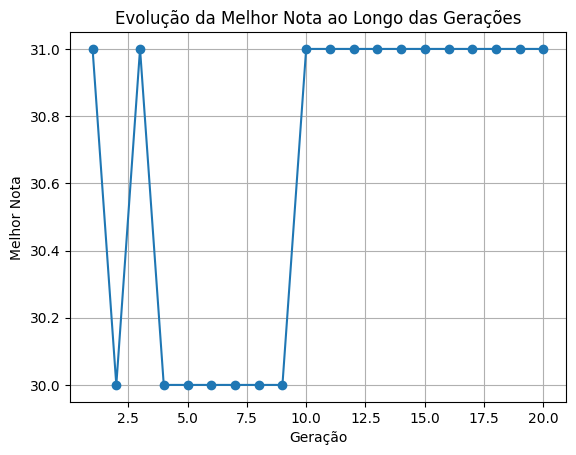

Melhor solução encontrada: [1, 0, 1, 0, 1]
Valor total da solução: 31
Peso total da solução: 8


In [21]:
import random
import matplotlib.pyplot as plt

# Parâmetros do problema
pesos = [2, 3, 5, 7, 1]  # Pesos dos itens
valores = [10, 5, 15, 7, 6]  # Valores dos itens
capacidade = 10  # Capacidade da mochila
n = len(pesos)  # Número de itens

# Parâmetros do algoritmo genético
tamanho_populacao = 10  # Número de indivíduos na população
num_geracoes = 20  # Número de gerações
taxa_mutacao = 0.1  # Chance de um gene (0 ou 1) sofrer mutação

# Função para criar um indivíduo aleatório
def criar_individuo():
    return [random.randint(0, 1) for _ in range(n)]  # Lista de 0s e 1s aleatórios

# Função para calcular a nota (fitness) de um indivíduo
def calcular_nota(individuo):
    peso_total = sum(pesos[i] for i in range(n) if individuo[i] == 1)
    valor_total = sum(valores[i] for i in range(n) if individuo[i] == 1)
    if peso_total > capacidade:
        return 0  # Nota zero se o peso exceder a capacidade
    else:
        return valor_total  # Nota é o valor total dos itens na mochila

# Função para selecionar os melhores indivíduos
def selecionar_pais(populacao):
    # Ordena a população pela nota (do maior para o menor)
    populacao_ordenada = sorted(populacao, key=calcular_nota, reverse=True)
    # Escolhe os 50% melhores para serem pais
    return populacao_ordenada[:tamanho_populacao // 2]

# Função para fazer crossover (reprodução)
def crossover(pai1, pai2):
    ponto_corte = random.randint(1, n - 1)  # Escolhe um ponto de corte aleatório
    filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]  # Mistura partes dos pais
    filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
    return filho1, filho2

# Função para aplicar mutação
def mutar(individuo):
    for i in range(n):
        if random.random() < taxa_mutacao:  # Chance de mutação
            individuo[i] = 1 - individuo[i]  # Troca 0 por 1 ou 1 por 0
    return individuo

# Cria a população inicial
populacao = [criar_individuo() for _ in range(tamanho_populacao)]

# Lista para armazenar a melhor nota de cada geração
melhores_notas = []

# Variáveis para armazenar a melhor solução global
melhor_solucao_global = None
melhor_nota_global = -1
melhor_peso_global = 0

# Executa o algoritmo genético
for geracao in range(num_geracoes):
    # Seleciona os pais
    pais = selecionar_pais(populacao)

    # Cria a próxima geração
    nova_geracao = []
    while len(nova_geracao) < tamanho_populacao:
        pai1, pai2 = random.sample(pais, 2)  # Escolhe dois pais aleatórios
        filho1, filho2 = crossover(pai1, pai2)  # Faz crossover
        nova_geracao.append(mutar(filho1))  # Aplica mutação e adiciona à nova geração
        nova_geracao.append(mutar(filho2))

    # Substitui a população antiga pela nova
    populacao = nova_geracao

    # Encontra o melhor indivíduo da geração atual
    melhor_individuo = max(populacao, key=calcular_nota)
    melhor_nota = calcular_nota(melhor_individuo)
    melhor_peso = sum(pesos[i] for i in range(n) if melhor_individuo[i] == 1)

    # Atualiza a melhor solução global
    if melhor_nota > melhor_nota_global:
        melhor_solucao_global = melhor_individuo
        melhor_nota_global = melhor_nota
        melhor_peso_global = melhor_peso

    # Armazena a melhor nota da geração
    melhores_notas.append(melhor_nota)

    # Exibe informações da geração no console
    print(f"Geração {geracao + 1}:")
    print("Melhor solução encontrada:", melhor_individuo)
    print("Valor total da solução:", melhor_nota)
    print("Peso total da solução:", melhor_peso)
    print("-" * 30)

# Plota o gráfico da evolução da melhor nota
plt.plot(range(1, num_geracoes + 1), melhores_notas, marker='o')
plt.title("Evolução da Melhor Nota ao Longo das Gerações")
plt.xlabel("Geração")
plt.ylabel("Melhor Nota")
plt.grid(True)
plt.show()

# Exibe a melhor solução após todas as iterações
print("Melhor solução encontrada:", melhor_solucao_global)
print("Valor total da solução:", melhor_nota_global)
print("Peso total da solução:", melhor_peso_global)